In [1]:
from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier

In [2]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import pandas as pd
import numpy as np

In [3]:
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
Y = iris.target

In [4]:
str(len(X))+' '+str(len(Y))

'150 150'

In [155]:
for i,a in enumerate(X):
    if a[0] == 6 and a[1] == 2.2:
        print(i)

62
119


In [157]:
print(str(Y[62]) + " " + str(Y[119]))

1 2


## Input data set is sorted, so extract randomized sample

In [86]:
train_size = 105
val_size = 45

In [81]:
data = pd.DataFrame(X)
data[2] = Y
training_subset = data.sample(train_size) #get random subset of 70%
X_train = training_subset[[0,1]].to_numpy()
Y_train = training_subset[[2]].to_numpy()
Y_train = Y_train.reshape(train_size,)

In [71]:
chosen_subset = training_subset.index.values.tolist()
X_val = np.empty([0, 0])
Y_val = np.empty([0])
for i in range(150):
    if i in chosen_subset: continue
    
    X_val = np.append(X_val, X[i])
    Y_val = np.append(Y_val, Y[i])
    
X_val = X_val.reshape(val_size,2)

## Train model

In [125]:
k_list = [1,5,10,20,30]

In [152]:
nbrs = KNeighborsClassifier(n_neighbors=1)
nbrs.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [124]:
def train(n_nbrs, val):
    nbrs = KNeighborsClassifier(n_neighbors=n_nbrs)
    nbrs.fit(X_train, Y_train)
    if val:
        return nbrs.score(X_val, Y_val)
    else:
        return nbrs.score(X_train, Y_train)

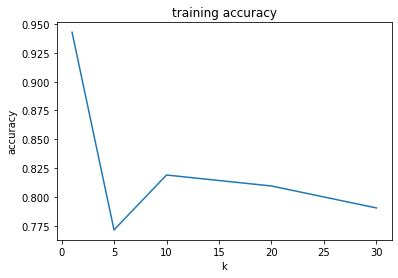

In [133]:
results = []
for k in k_list:
    results.append(train(k, False))

plt.plot(k_list, results)
plt.title('training accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.savefig('train_accuracy')
plt.show()

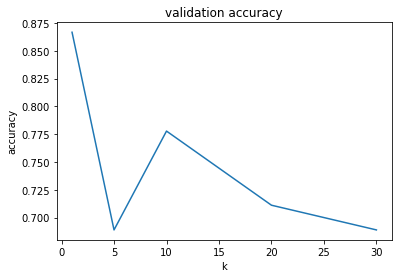

In [134]:
results = []
for k in k_list:
    results.append(train(k, True))

plt.plot(k_list, results)
plt.title('validation accuracy')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.savefig('val_accuracy')
plt.show()

In [108]:
df = pd.DataFrame(X_train)
df[2] = Y_train

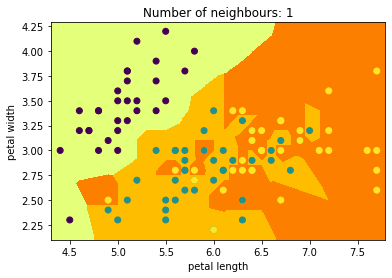

In [153]:
decisionBoundary(df, 1)

In [140]:
def decisionBoundary(df, nn):
    x_min = df[0].min(); x_max = df[0].max()
    y_min = df[1].min(); y_max = df[1].max()
    h=.01
    xx, yy = np.meshgrid(np.arange(x_min-0.1, x_max+0.1, h), np.arange(y_min-0.1, y_max+0.1, h))
    Z=nbrs.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cm = plt.get_cmap('Wistia')
    plt.pcolormesh(xx, yy, Z, cmap=cm)
    plt.scatter(df[0], df[1], c=df[2])
    plt.title("Number of neighbours: " + str(nn))
    plt.xlabel("petal length")
    plt.ylabel("petal width")
    plt.savefig(("NN" + str(nn) + ".png"))
    plt.show()